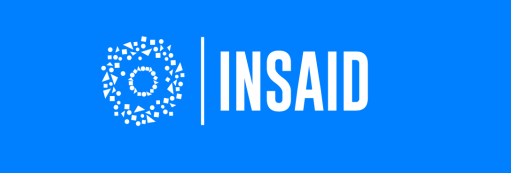

# Intership Task - Data Science and Machine Learning
<hr/>

Submitted by <br>
Name: **Pragathi S P** <br>
<hr/>



### Problem Definition : Fraud detection

Everyone is exposed to financial fraud if you're selling or buying something online providing financial services or simply processing tons of payments we face fraud risks every day for. businesses scams are especially scary because
we are not only losing money but also customers who may no longer trust banks. Detecting and preventing fraud is essential and there are two approaches to catching fraud:
1. Using rule based system.
2. By machine learning.


Rule-based systems work on detect fraudulent encounters and looks for similarities between accounts that committed fraud using analytics
<br>

**For example:** finding that many fraudulent accounts were registered in asia while making the trips in the biggest cities around the world like london or new york. These accounts were also created within mere seconds from one another and has gibberish in their email addresses and often use the same credit card the geolocation of account creation revealed.

<br> 
Machine learning based systems are extremely good at finding patterns that humans can't. Machine learning knows very nuanced distinctions between normal and fraudulent activities and finds way more signals than human analysts do.

#### Step 1: Understanding what is normal.
Frauds don't happen that often and we don't want to be alerted about suspicious behavior all the time. We need to minimize false positives like people who simply want to use their credit card on vacation so a model has to know what behavior is normal to identify what deviates from that normal and what signals point to fraudulent activity.

It's first trained on historical data historical data are past transactions both fraudulent and not each transaction stores all different attributes. Features like exact time of transaction,  purchase amount, credit card number, shipping address  and sometimes several attributes are combined to create a feature like the transaction date and the date of the customer's past transaction. 

#### Step 2: Finding anomalies 
One of the most common targets of financial fraud today are e-commerce merchants because opening new accounts or accessing customer accounts is not that hard online stores are prone to scam. Fraud is also solved by distinguishing normal customer behavior from abnormal and this is called **behavioral analytics**. All customers are segmented into groups so the system can easily identify if one customer's behavior fits the behavior of the group.

#### Step 3: Eliminating mistakes 
Many advanced fraud detection systems are effective in 99 of cases the remaining 1 are errors false positives and false negatives. False positives occur when the model detects fraud where there's none false negatives are fraudulent transactions that slip through but since there are many more valid transactions than fraudulent ones increasing the effectiveness of
the model. This will also boost the number of false positives which is a hit to customer satisfaction a card declined can cost a customer.

### Approach

#### Model used : Artificial Neural Network (Deep Learning)


A machine learning model calculates a fraud score an algorithm doesn't make decisions based on a yes or no answer. It actually returns the probability of the fraud as a customer's purchase activity is rarely squeaky clean. The system calculates how likely it is that this exact purchase is fraud when the fraud score is low. The purchase is approved when high the system flags the transaction as suspicious to be reviewed by the store or the customer.

####  Why ANN ?
This problem is handled by using Deep neural networks neural networks. They allow us to find non-linear relations between a massive amount of data points without manually selecting features these relations can be so nuanced that we would fail to understand the logic behind the final decision this complex processing allows neural networks to learn from much more pieces of information than traditional machine learning models.


### Sections

1. Importing libraries
1. Exploratory data analysis 
1. Correlation check
1. Handling Missing Values
1. Outlier analysis
1. Model building and Comparision


### Importing Libraries and dataset

In [52]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
data=pd.read_csv(r'C:\Users\Lenovo\Downloads\Fraud.csv')

### Exploratory data analysis

In [54]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [55]:
data.shape

(6362620, 11)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [57]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [58]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

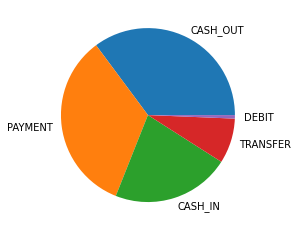

In [59]:
values = data['type'].value_counts().values
labels = data['type'].value_counts().keys()
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels)
plt.show()

<AxesSubplot:xlabel='isFraud', ylabel='count'>

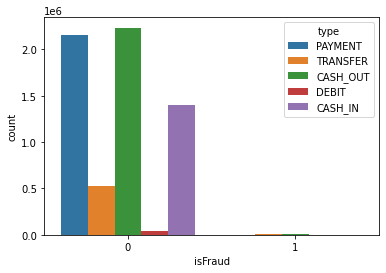

In [11]:
sns.countplot(data=data, x=data['isFraud'], hue='type')

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

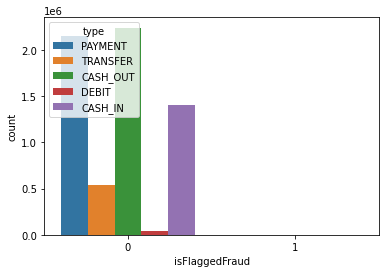

In [14]:
sns.countplot(data=data, x=data['isFlaggedFraud'], hue='type')

In [60]:
print("Total number of Fraud Transaction is ", data[data['isFraud']==1]['isFraud'].count())
print("Total number of Transaction flagged as fraud is ", data[data['isFlaggedFraud']==1]['isFlaggedFraud'].count())

Total number of Fraud Transaction is  8213
Total number of Transaction flagged as fraud is  16


In [18]:
num_data=data.select_dtypes(include='number')

In [19]:
num_data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

### Correlation check

In [61]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

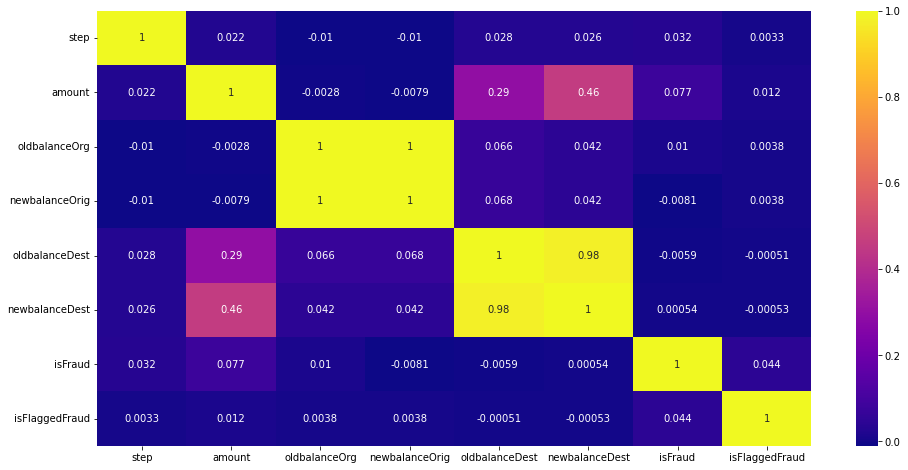

In [100]:
plt.figure(figsize = (16,8))
sns.heatmap(data.corr(),annot=True,cmap='plasma')

In [65]:
data1=data.copy()
data1.head(2)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['type']=le.fit_transform(data['type'])
data1['nameOrig']=le.fit_transform(data['nameOrig'])
data1['nameDest']=le.fit_transform(data['nameDest'])
data1.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0


In [70]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(data1)


,features,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


- The vif factors for columns oldbalanceOrg and newbalanceOrig are >10 and too high.
- VIF for oldbalanceDest and newbalanceDest are greater than 10.
Hence there is a linear relationship between indepedent variables.

### Handling Missing Values 

In [71]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**The dataset doesnot have missing values**

### Outlier analysis

Most of the transactions in the dataset are legit, only a very small portion are fraudulent. The data is very imbalanced. In fraud detection problem outliers plays an important role and contributes much predicting fraud transactions. Thus I haven't removed the outliers here.

<AxesSubplot:>

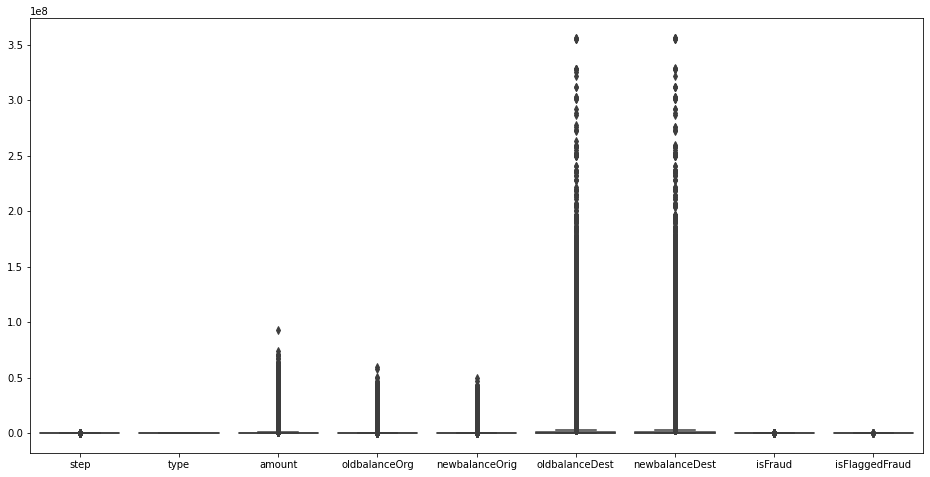

In [72]:
plt.figure(figsize = (16,8))
sns.boxplot(data=data)

In [ ]:
sns.scatterplot(data=data)

#### Rearranging the columns

In [8]:
for i in data.columns:
    print(i)

step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


In [46]:
col_title=['type','nameOrig','nameDest', 'step','amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 
       'isFlaggedFraud','isFraud']

In [75]:
data.head()

,type,nameOrig,nameDest,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,3,C1231006815,M1979787155,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,3,C1666544295,M2044282225,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,4,C1305486145,C553264065,1,181.00,181.0,0.00,0.0,0.0,0,1
3,1,C840083671,C38997010,1,181.00,181.0,0.00,21182.0,0.0,0,1
4,3,C2048537720,M1230701703,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [73]:
cat_col=data.select_dtypes(exclude='number').columns
print(cat_col)

Index(['nameOrig', 'nameDest'], dtype='object')


In [74]:
data=data.reindex(columns=col_title)

In [77]:
data=data.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1)

In [78]:
X=data.iloc[:,:-1].values

In [79]:
print(X[1,:])

[3 'C1666544295' 'M2044282225' 1 1864.28 0]


In [80]:
y=data.iloc[:,-1].values
print(y)

[0 0 1 ... 1 1 1]


### ANN model

In [81]:
import tensorflow as tf

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])

In [83]:
print(X[1,:])

[3 2188998 1733924 1 1864.28 0]


In [84]:
X.shape

(6362620, 6)

#### Spliting the dataset into Training and test setm

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Feature scaling


In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


### ANN model

- Since I have outlier included I do not prefered logistic regression or decision trees.  
<br>
This dataset can also be trained with SVM model but I prefered Artifical neural network over SVM cause of size of the dataset is large. 

#### Intializing the ANN

In [87]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,activation='relu')) #First layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu')) #second layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #output layer


#### Compiling the model

In [88]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
ann.fit(X_train,y_train,batch_size=32,epochs=6)

Epoch 1/6
159066/159066 [==============================] - 359s 2ms/step - loss: 0.0075 - accuracy: 0.9987
Epoch 2/6
159066/159066 [==============================] - 349s 2ms/step - loss: 0.0065 - accuracy: 0.9989
Epoch 3/6
159066/159066 [==============================] - 335s 2ms/step - loss: 0.0065 - accuracy: 0.9989
Epoch 4/6
159066/159066 [==============================] - 461s 3ms/step - loss: 0.0065 - accuracy: 0.9989
Epoch 5/6
159066/159066 [==============================] - 489s 3ms/step - loss: 0.0065 - accuracy: 0.9989
Epoch 6/6
159066/159066 [==============================] - 479s 3ms/step - loss: 0.0065 - accuracy: 0.9989


### Conclusion

For this particular problem statement of fraud detection I have used ANN and the model has achieved the accuracy of 0.99. 



